## Income Group Classification

### Dataset

* age: continuous - age of a Person 
* workclass: Where does a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous
* education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: no. of years a person studied - continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. of hours a person works - continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

### Load data

In [2]:
data = pd.read_csv("adult_census_data.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-no. of years,marital status,occupation,race,sex,capital gain,capital loss,working hours per week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(32561, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marital status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   race                    32561 non-null  object
 8   sex                     32561 non-null  object
 9   capital gain            32561 non-null  int64 
 10  capital loss            32561 non-null  int64 
 11  working hours per week  32561 non-null  int64 
 12  native-country          32561 non-null  object
 13  salary                  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [7]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]
data.columns = [col.replace("-", "_") for col in data.columns]
data.columns = [col.replace(".", "") for col in data.columns]

In [8]:
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_no_of_years,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'native_country', 'salary'],
      dtype='object')

In [11]:
data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
# replace ? with 'Unknown'
data.workclass = data.workclass.apply(lambda x: "Unknown" if x == " ?" else x)
data.native_country = data.native_country.apply(lambda x: "Unknown" if x == " ?" else x)
data.occupation = data.occupation.apply(lambda x: "Unknown" if x == " ?" else x)

In [13]:
# unique number of countries
data.native_country.nunique()

42

In [14]:
data.native_country = data.native_country.str.replace(" ", "")

In [15]:
north_america = [
    "Canada",
    "Cuba",
    "Dominican-Republic",
    "El-Salvador",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Outlying-US(Guam-USVI-etc)",
    "Puerto-Rico",
    "Trinadad&Tobago",
    "United-States",
]
asia = [
    "Cambodia",
    "China",
    "Hong",
    "India",
    "Iran",
    "Japan",
    "Laos",
    "Philippines",
    "Taiwan",
    "Thailand",
    "Vietnam",
]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = [
    "England",
    "France",
    "Germany",
    "Greece",
    "Holand-Netherlands",
    "Hungary",
    "Ireland",
    "Italy",
    "Poland",
    "Portugal",
    "Scotland",
    "Yugoslavia",
]
other = ["South", "Unknown", "?"]

In [16]:
def region_combining(x):
    if x in north_america:
        return "north_america"
    elif x in asia:
        return "asia"
    elif x in south_america:
        return "south_america"
    elif x in europe:
        return "europe"
    elif x in other:
        return "other"
    else:
        return x

In [17]:
data["native_country"] = data["native_country"].apply(region_combining)

In [18]:
print("Distinct values in Native Country column:", data.native_country.nunique())

Distinct values in Native Country column: 5


In [19]:
data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

We can reduce these values into the following groups:
* Married
* Not-Married
* Never-Married

In [20]:
data.marital_status = data.marital_status.str.replace(" ", "")

married = ["Married-civ-spouse", "Married-AF-spouse"]
not_married = ["Divorced", "Separated", "Widowed", "Married-spouse-absent"]


def reduce_marital_status(x):
    if x in married:
        return "married"
    elif x in not_married:
        return "not_married"
    else:
        return x

In [21]:
data.marital_status = data.marital_status.apply(reduce_marital_status)

In [22]:
data.marital_status.unique()

array(['Never-married', 'married', 'not_married'], dtype=object)

## Univariate Analysis

### Observations on hours_per_week

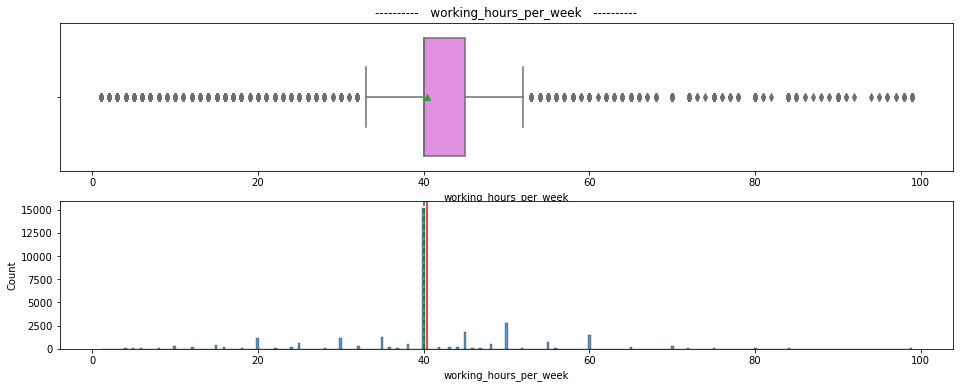

In [23]:
col = "working_hours_per_week"
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.title("----------   " + col + "   ----------")
sns.boxplot(data=data, x=col, showmeans=True, color="violet")
plt.subplot(2, 1, 2)
sns.histplot(data=data, x=col)
plt.axvline(data[col].mean(), color="red", linestyle="-")
plt.axvline(data[col].median(), color="green", linestyle="--")
plt.show()

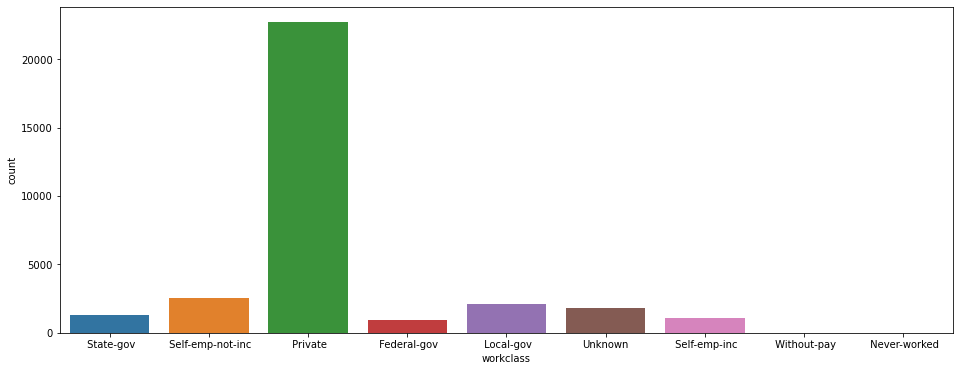

In [24]:
plt.figure(figsize=(16, 6))
sns.countplot(data=data, x="workclass")
plt.show()

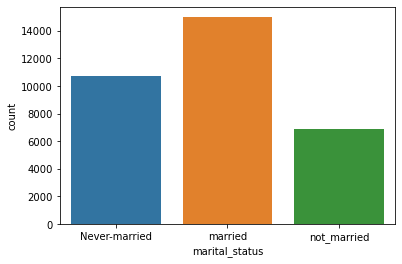

In [25]:
sns.countplot(data=data, x="marital_status")
plt.show()

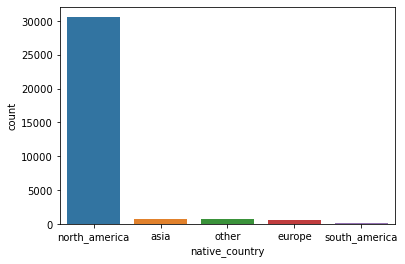

In [26]:
sns.countplot(data=data, x="native_country")
plt.show()

### Observations on salary

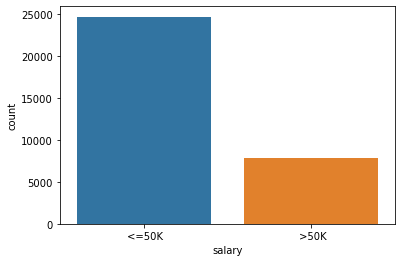

In [27]:
sns.countplot(data=data, x="salary")
plt.show()

## Bivariate analysis

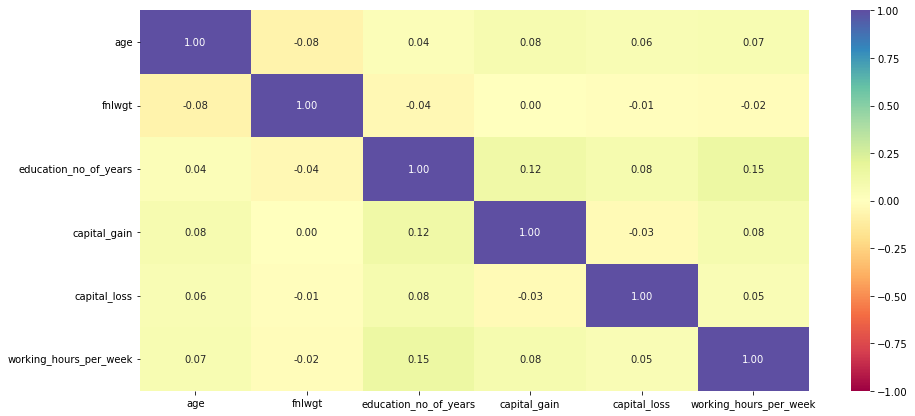

In [28]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [29]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["salary"], margins=True).sort_values(
        by=" >50K", ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["salary"], normalize="index").sort_values(
        by=" >50K", ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [30]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

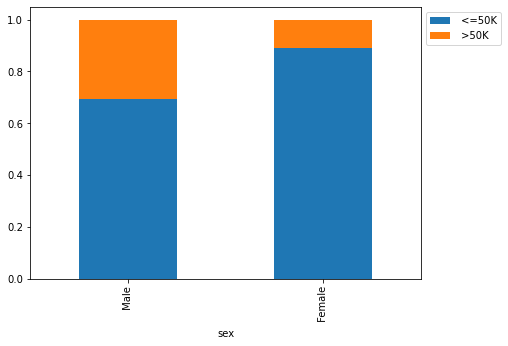

In [31]:
stacked_barplot(data, "sex", "salary")

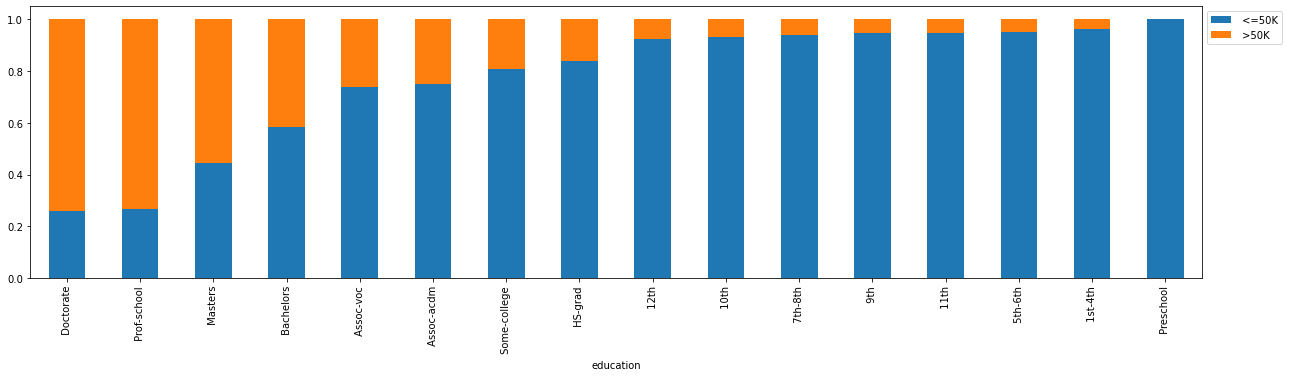

In [32]:
stacked_barplot(data, "education", "salary")

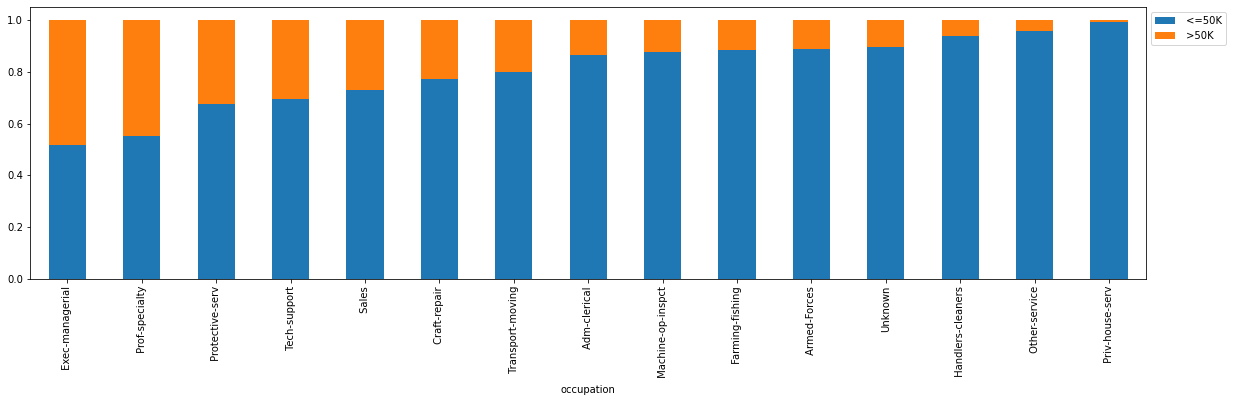

In [33]:
stacked_barplot(data, "occupation", "salary")

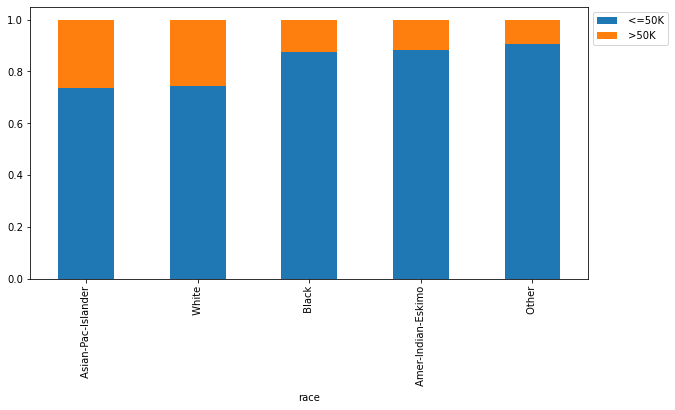

In [34]:
stacked_barplot(data, "race", "salary")

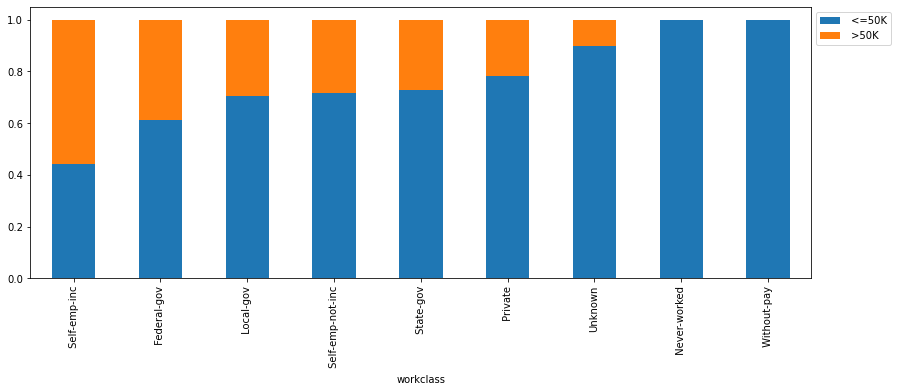

In [35]:
stacked_barplot(data, "workclass", "salary")

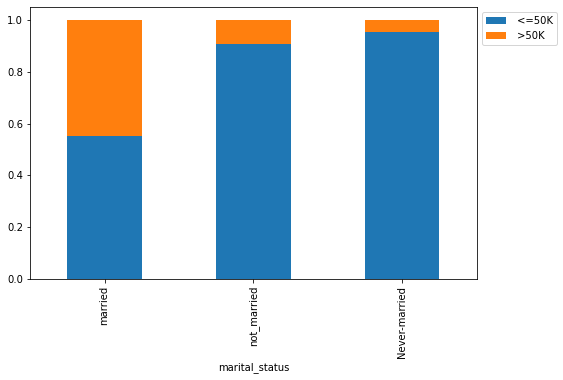

In [36]:
stacked_barplot(data, "marital_status", "salary")

In [37]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'working_hours_per_week', 'native_country', 'salary'],
      dtype='object')

In [38]:
data.drop(["fnlwgt", "capital_gain", "capital_loss"], axis=1, inplace=True)

In [39]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

In [40]:
# Encoding >50K as 1 and <=50K as 0
data["salary"] = data["salary"].apply(lambda x: 1 if x == " >50K" else 0)

**Creating training and test sets.**

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0],)

    return df_perf

### Logistic Regression

In [42]:
X = data.drop(["salary", 'education'], axis=1)
Y = data["salary"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43234, stratify=Y)

In [43]:
X.head()

,age,education_no_of_years,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,marital_status_married,marital_status_not_married,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_country_europe,native_country_north_america,native_country_other,native_country_south_america
0,39,13,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
1,50,13,13,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
2,38,9,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,53,7,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,28,13,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [44]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(X_train, y_train)  # train the model

logit_train_perf = model_performance_classification_sklearn(logit, X_train, y_train)
logit_train_perf

,Accuracy,Recall,Precision,F1
0,0.834114,0.552048,0.69622,0.615809


In [45]:
logit_test_perf = model_performance_classification_sklearn(logit, X_test, y_test)
logit_test_perf

,Accuracy,Recall,Precision,F1
0,0.831568,0.547832,0.688853,0.610302


In [46]:
# putting the model coefficients, their odds ratios and percent_change_odds in a single dataframe
features_names = ["Intercept"] + list(logit.feature_names_in_)
coef = list(logit.intercept_) + list(*logit.coef_)
logit_summary = pd.DataFrame({"Feature_Names": features_names, "Coefficient": coef})
logit_summary["odds"] = np.exp(logit_summary["Coefficient"])
logit_summary["percent_change_odds"] = (np.exp(logit_summary["Coefficient"]) - 1) * 100
logit_summary

,Feature_Names,Coefficient,odds,percent_change_odds
0,Intercept,-5.941393,0.002628,-99.737164
1,age,0.029137,1.029566,2.956600
2,education_no_of_years,0.293620,1.341274,34.127431
3,working_hours_per_week,0.029742,1.030189,3.018917
4,workclass_ Local-gov,-0.988115,0.372278,-62.772231
5,workclass_ Never-worked,-0.012242,0.987833,-1.216714
6,workclass_ Private,-0.782343,0.457333,-54.266685
7,workclass_ Self-emp-inc,-0.553277,0.575062,-42.493761
8,workclass_ Self-emp-not-inc,-1.126786,0.324073,-67.592686
9,workclass_ State-gov,-1.189171,0.304474,-69.552630


### Coefficient interpretations

For continuous features

* `age`: Holding all other features constant a 1 unit change in Age will increase the odds of a person having salary >50k by 1.03 times or a 2.96% increase in odds of having salary >50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by 0.93 times or a decrease of 6.6% decrease in odds of having salary <=50K.

For categorical features

* The odds of a person whose marital status is married having a salary >50K is 12.8 time more than the person who has never married or 1180.5% higher odds of having salary >50K. Similarly, The odds of a person whose marital status is not_married having a salary >50K is 01.56 times more than the person who has never married or 55.6% more odds of having a salary >50K than the person who has never married. [keeping Never_married category as a reference].


`Interpretation for other features can be done similarly.`